<a href="https://colab.research.google.com/github/IrfanPurwoSaputro/quiz2/blob/main/quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





*   Nama : Irfan Purwo Saputro
*   Kelas : TI-4J
*   NIM : 2241727017





# Import Data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
df = pd.read_csv('dataset_quiz.csv')

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [22]:
df.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [23]:
df.dtypes

id_ketua              float64
id_anggota1           float64
id_anggota2           float64
id_anggota3           float64
id_anggota4           float64
id_anggota5           float64
keterlibatan_vltr      object
jml_vltr_terlibat       int64
tahun                   int64
skema                  object
luaran_hki             object
jenis_luaran_hki       object
potensi_hki            object
luaran_lain            object
jenis_luaran_lain      object
status_luaran_lain     object
dtype: object

In [24]:
df.pivot_table('jml_vltr_terlibat', ['tahun'], aggfunc='sum').reset_index()

,tahun,jml_vltr_terlibat
0,2019,0
1,2020,39
2,2021,26
3,2022,49


# Jenis visualisasi

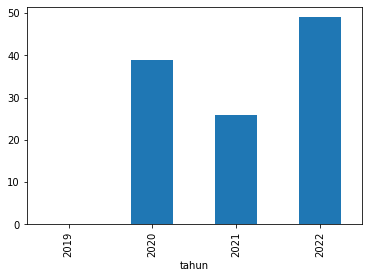

In [25]:
df.groupby('tahun').jml_vltr_terlibat.sum().plot.bar()

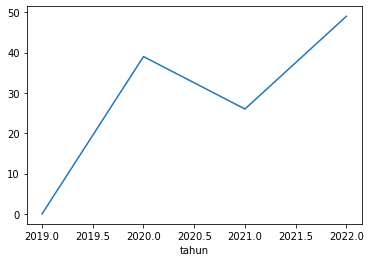

In [26]:
df.groupby('tahun').jml_vltr_terlibat.sum().plot.line()

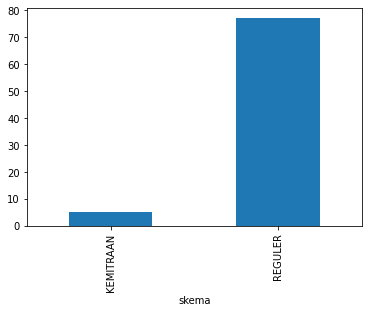

In [49]:
df.groupby('skema').id_ketua.count().plot.bar()

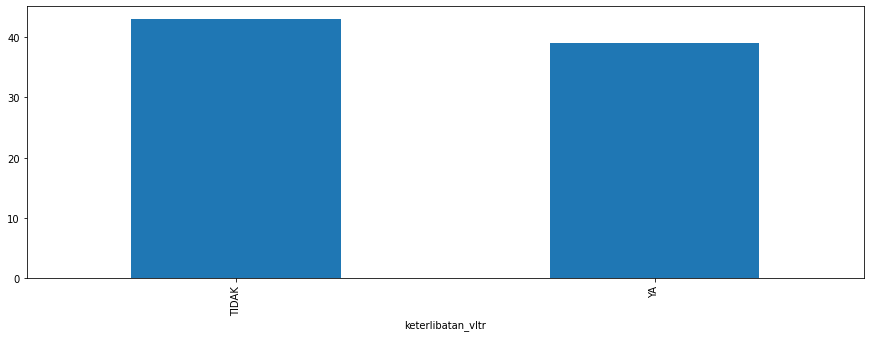

In [48]:
plt.figure(figsize=(15,5))
df.groupby(['keterlibatan_vltr'])['id_ketua'].count().plot.bar()
plt.show()

# Pemilahan data training dan testing

In [29]:
y = df['keterlibatan_vltr'].map({'YA':1, 'TIDAK':0})
X1 = df['luaran_lain'].map({'TIDAK ADA':0, 'YA':1})
X2 = df['status_luaran_lain'].map({'Draft':1, 'Terpublikasi':1, 'TIDAK ADA':0})

v1=[]
v2=[]
for x1 in X1:
  v1.append(x1)
for x2 in X2:
  v2.append(x2)

X = pd.DataFrame()

X['luaran_lain'] = v1
X['status_luaran_lain'] = v2
print(X)

# m = df.iloc[:,7:]

# m.head(50)

    luaran_lain  status_luaran_lain
0             0                   0
1             0                   0
2             0                   0
3             0                   0
4             0                   0
..          ...                 ...
80            0                   0
81            0                   0
82            0                   0
83            0                   0
84            0                   0

[85 rows x 2 columns]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Metode klasifikasi

In [31]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}") 

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


In [32]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


# Metode prediksi

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler()

In [35]:
StandardScaler(copy=True, with_mean=True, with_std=True)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [38]:
predictions = mlp.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


# Confusion Matrix

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[8 0]
 [7 2]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       1.00      0.22      0.36         9

    accuracy                           0.59        17
   macro avg       0.77      0.61      0.53        17
weighted avg       0.78      0.59      0.52        17



# Random Search

In [41]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

random = RandomizedSearchCV(dt, params, cv=cv)

%timeit random.fit(X, y)

score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')

1.1 s ± 409 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.5882352941176471
Konfigurasi hyperparameter: {'max_depth': 7, 'criterion': 'entropy'}


# Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(dt, param_grid=params, cv=cv)

%timeit grid.fit(X, y)

score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

596 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.5882352941176471
Konfigurasi hyperparameter: {'criterion': 'entropy', 'max_depth': 7}


# Visualiasi

## Random Forest Classifier

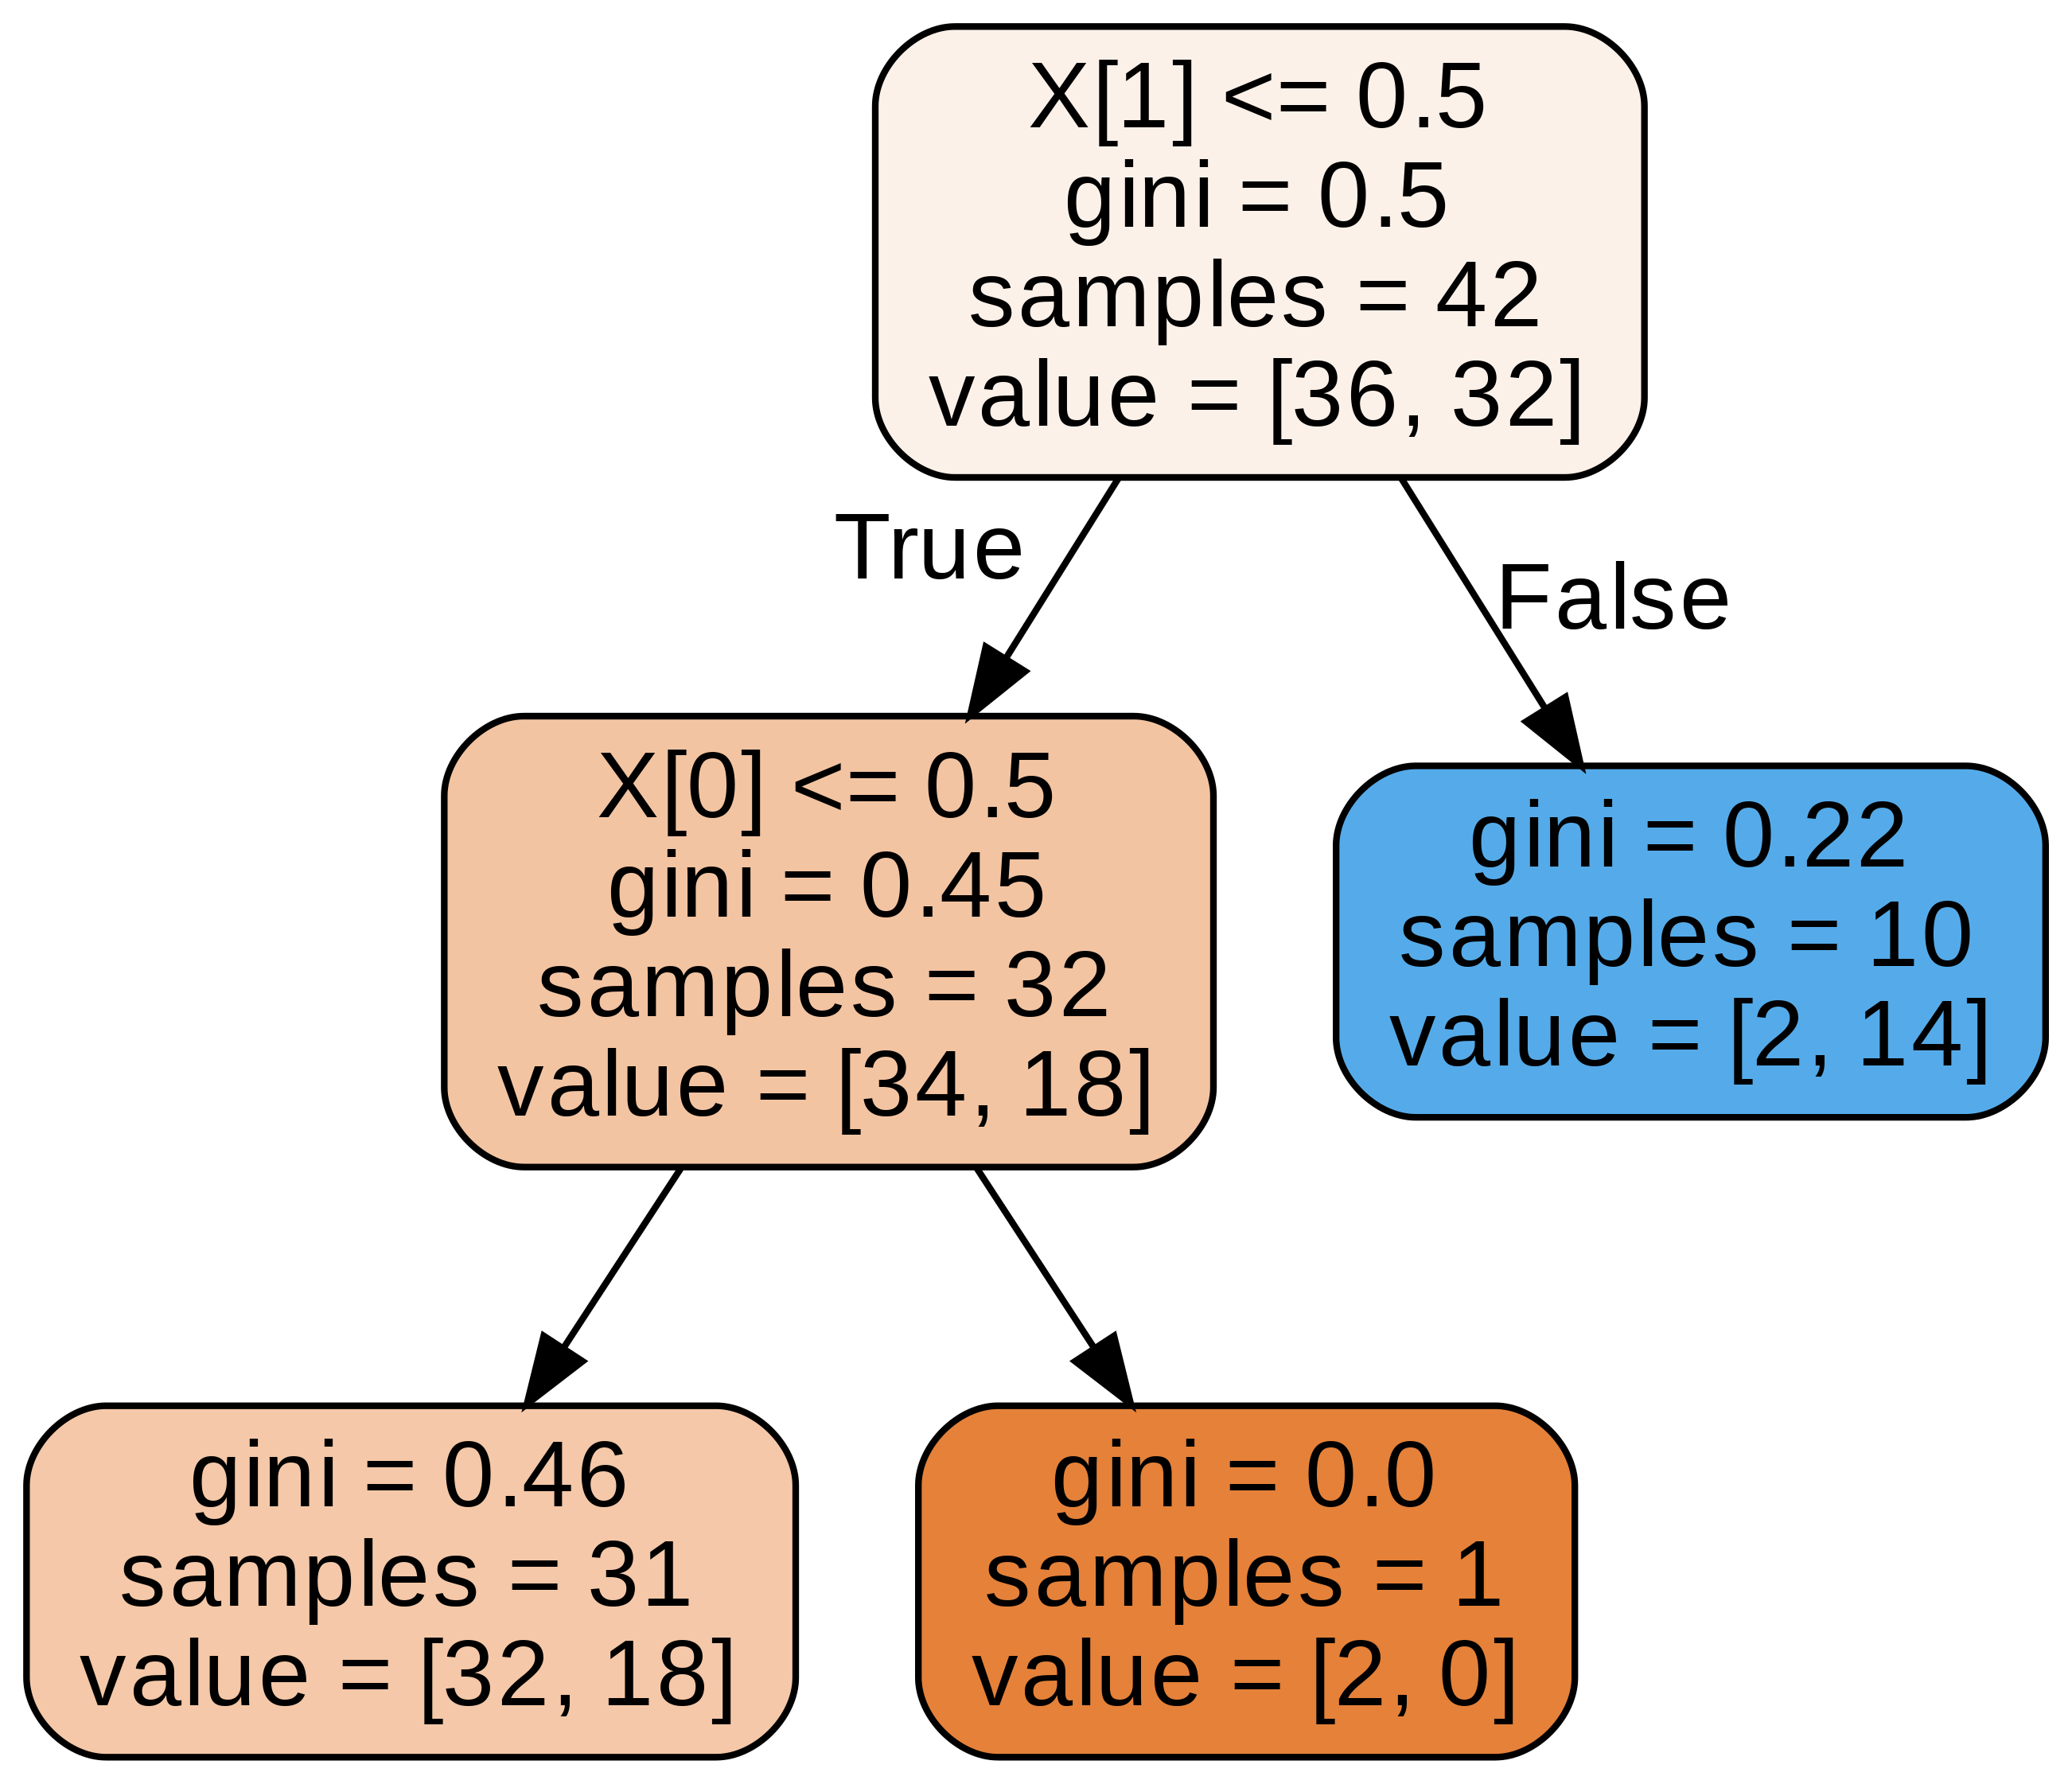

In [68]:
from sklearn.tree import export_graphviz

estimator = rf.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

## MLP CLassifier

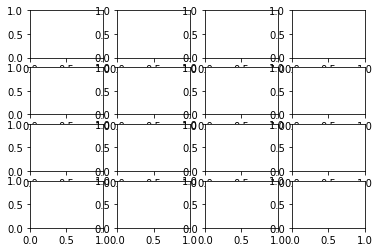

In [67]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

plt.show()